## <a href='https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/'> Source <a/>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
file1 = open('ATS_Lab_04_new/data/RSAFSNA.txt')
file_text_1 = file1.read()
y = np.array([float(x) for x in file_text_1.split()])

In [3]:
date = np.array('1992-02', dtype=np.datetime64)
date = date + np.arange(200)
date

array(['1992-02', '1992-03', '1992-04', '1992-05', '1992-06', '1992-07',
       '1992-08', '1992-09', '1992-10', '1992-11', '1992-12', '1993-01',
       '1993-02', '1993-03', '1993-04', '1993-05', '1993-06', '1993-07',
       '1993-08', '1993-09', '1993-10', '1993-11', '1993-12', '1994-01',
       '1994-02', '1994-03', '1994-04', '1994-05', '1994-06', '1994-07',
       '1994-08', '1994-09', '1994-10', '1994-11', '1994-12', '1995-01',
       '1995-02', '1995-03', '1995-04', '1995-05', '1995-06', '1995-07',
       '1995-08', '1995-09', '1995-10', '1995-11', '1995-12', '1996-01',
       '1996-02', '1996-03', '1996-04', '1996-05', '1996-06', '1996-07',
       '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01',
       '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07',
       '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01',
       '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07',
       '1998-08', '1998-09', '1998-10', '1998-11', 

In [4]:
df_y = pd.DataFrame({'Date': date, 'Value':y})
df_y = df_y.set_index('Date')

## Visualizate the data

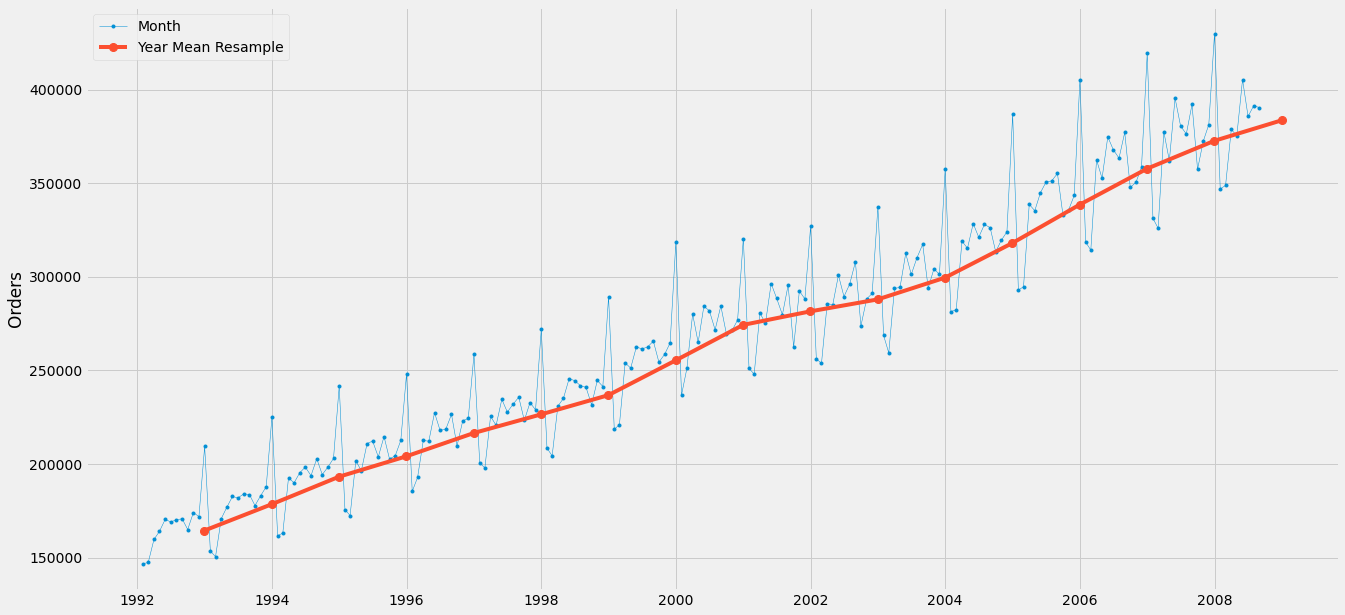

In [5]:

import warnings
import matplotlib.pyplot as plt
y = df_y['Value']
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Month')
ax.plot(y.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Year Mean Resample')
ax.set_ylabel('Orders')
ax.legend();

## Decomposing the Data

In [6]:
import statsmodels.api as sm

def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

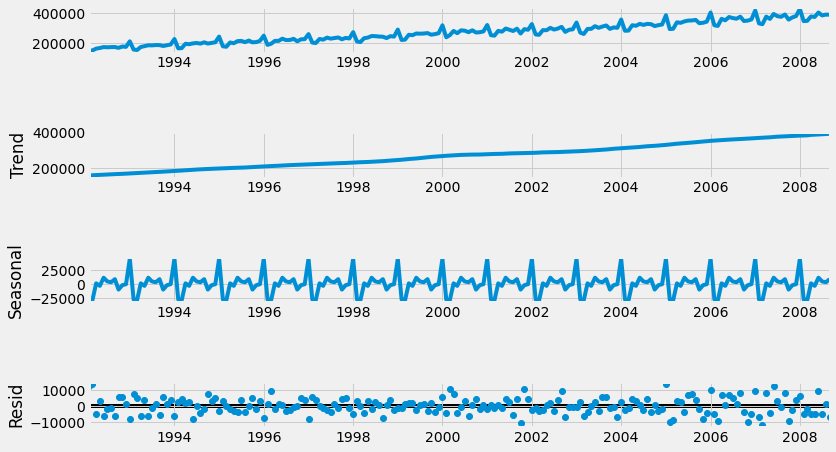

In [7]:
seasonal_decompose(df_y)

## Checking Stationarity

In [8]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

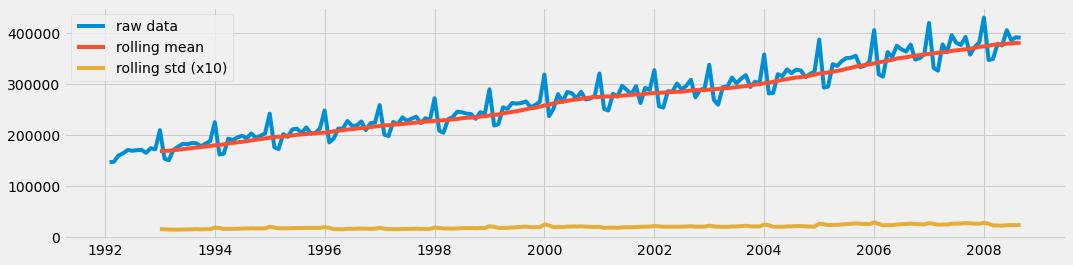

In [9]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

## Augmented Dickey-Fuller Test

In [10]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [11]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -0.026
P-value = 0.956
Critical values :
	1%: -3.4662005731940853 - The data is not stationary with 99% confidence
	5%: -2.8772932777920364 - The data is not stationary with 95% confidence
	10%: -2.575167750182615 - The data is not stationary with 90% confidence


## Detrending

 > Is the de-trended data stationary ?
Test statistic = -2.248
P-value = 0.189
Critical values :
	1%: -3.4680615871598537 - The data is not stationary with 99% confidence
	5%: -2.8781061899535128 - The data is not stationary with 95% confidence
	10%: -2.5756015922004134 - The data is not stationary with 90% confidence


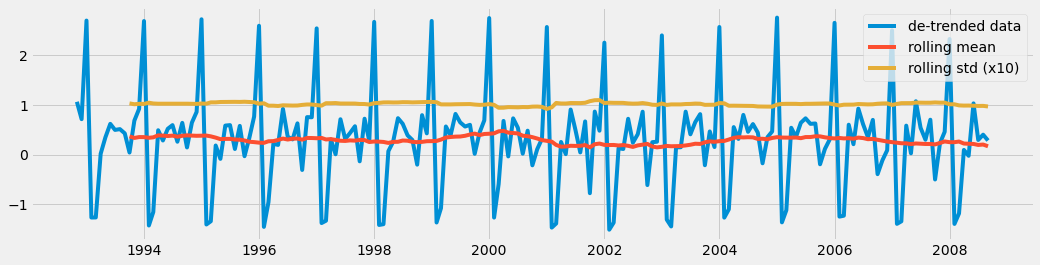

In [12]:
# Detrending
y_detrend =  (y - y.rolling(window=10).mean())/y.rolling(window=10).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

## Differencing

 > Is the 10 lag differenced data stationary ?
Test statistic = -2.627
P-value = 0.087
Critical values :
	1%: -3.4682803641749267 - The data is not stationary with 99% confidence
	5%: -2.8782017240816327 - The data is not stationary with 95% confidence
	10%: -2.5756525795918366 - The data is  stationary with 90% confidence


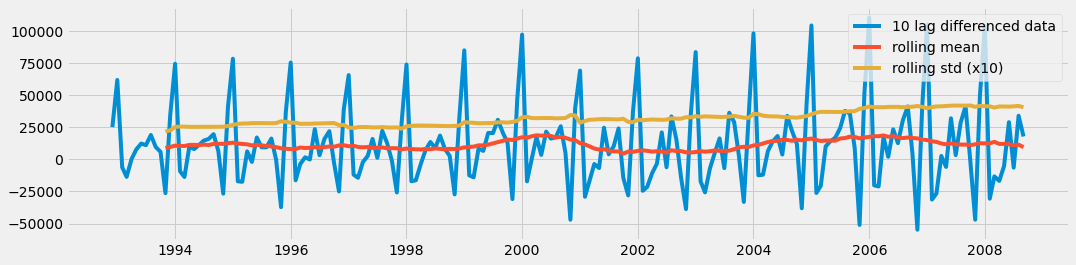

In [13]:
# Differencing
y_10lag =  y - y.shift(10)

test_stationarity(y_10lag,'10 lag differenced data')
ADF_test(y_10lag,'10 lag differenced data')

## Combining Detrending and Differencing


 > Is the 10 lag differenced de-trended data stationary ?
Test statistic = -3.802
P-value = 0.003
Critical values :
	1%: -3.4703698981001665 - The data is  stationary with 99% confidence
	5%: -2.8791138497902193 - The data is  stationary with 95% confidence
	10%: -2.576139407751488 - The data is  stationary with 90% confidence


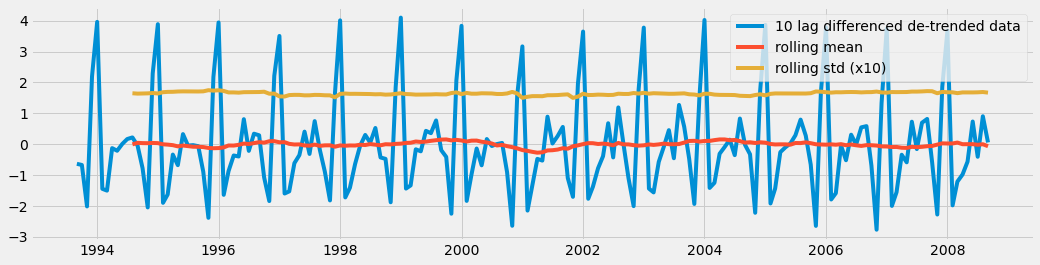

In [14]:
y_10lag_detrend =  y_detrend - y_detrend.shift(10)

test_stationarity(y_10lag_detrend,'10 lag differenced de-trended data')
ADF_test(y_10lag_detrend,'10 lag differenced de-trended data')

## Create Training & Testing Datasets


In [15]:
y_to_train = y[:'2007-05-01'] # dataset to train
y_to_val = y['2007-05-01':] # last X months for test  
predict_date = len(y) - len(y[:'2019-06-02']) # the number of data points for the test set

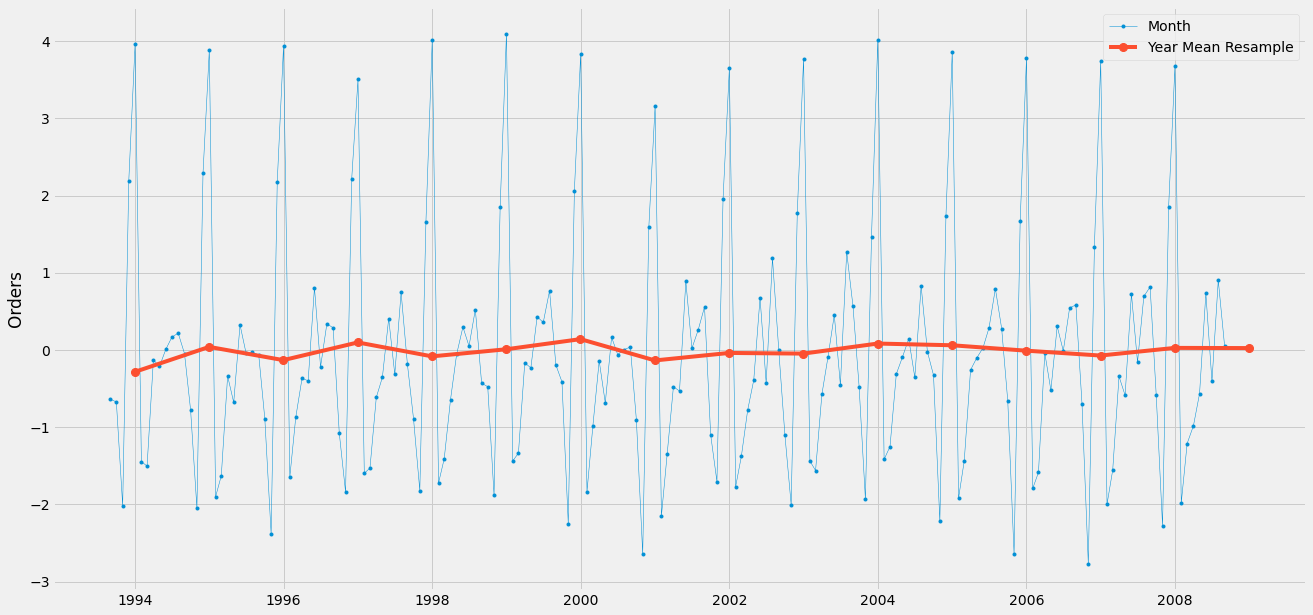

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(y_10lag_detrend,marker='.', linestyle='-', linewidth=0.5, label='Month')
ax.plot(y_10lag_detrend.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Year Mean Resample')
ax.set_ylabel('Orders')
ax.legend();

# <a href='https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/'> Source 2</a>